##Regression Models

C:\Users\fleve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediction for specific value 3000: 786458.8193439732


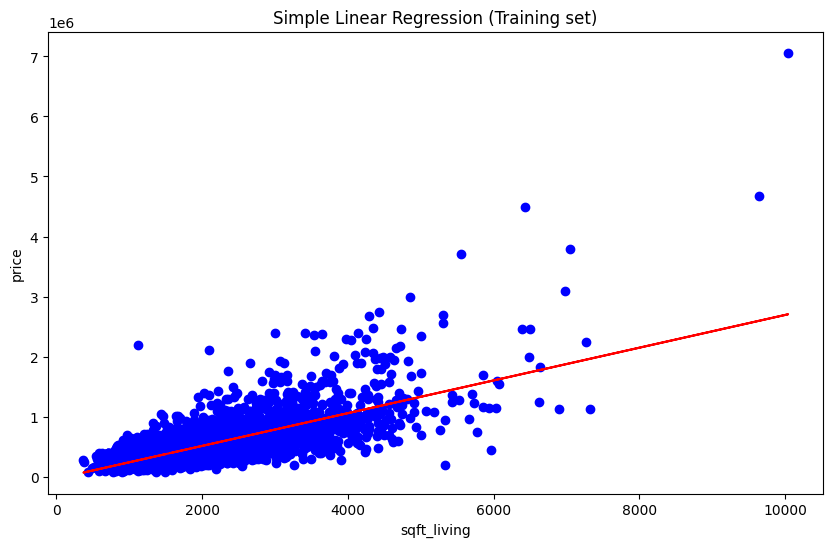

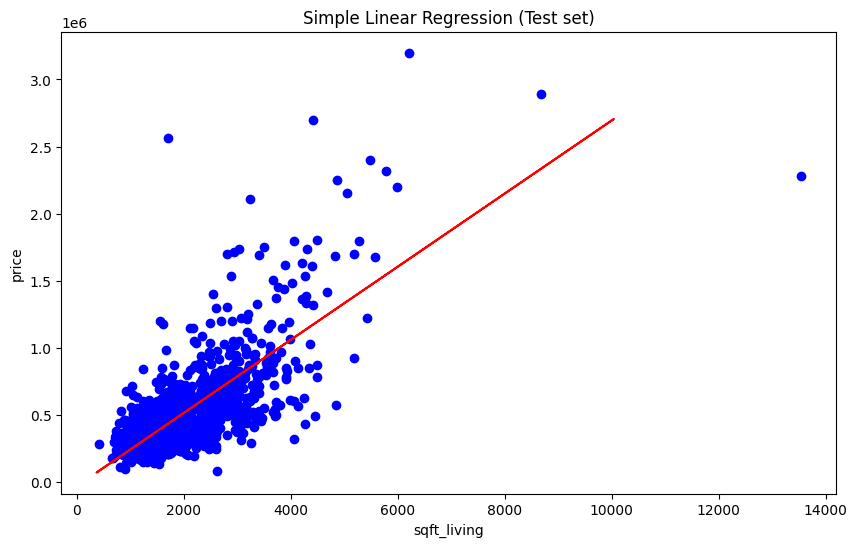

Final Linear Regression equation: y = 272.494041295621 * X + -31023.30454288982
Simple Linear Regression:
Mean Squared Error: 66885226602.19727
R2 Score: 0.49631467356924885
Prediction for specific value [   3    2 3000 5000    1]: 849395.1772432756


C:\Users\fleve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


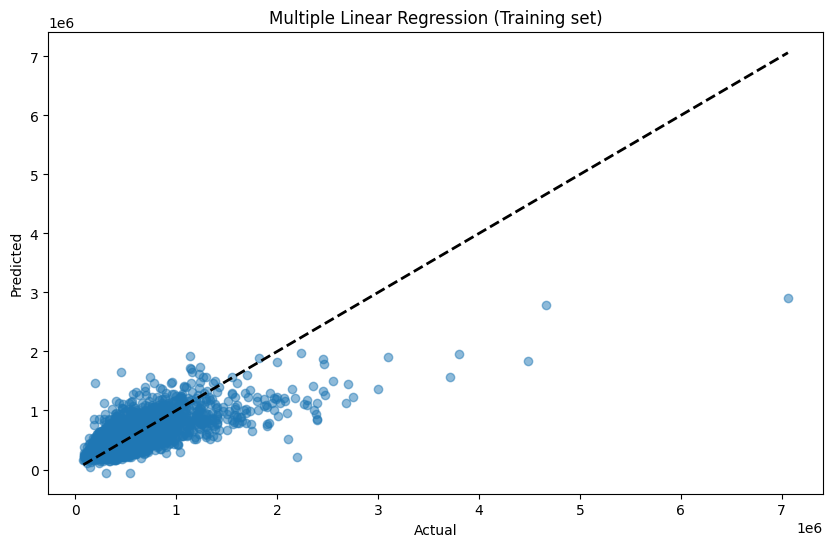

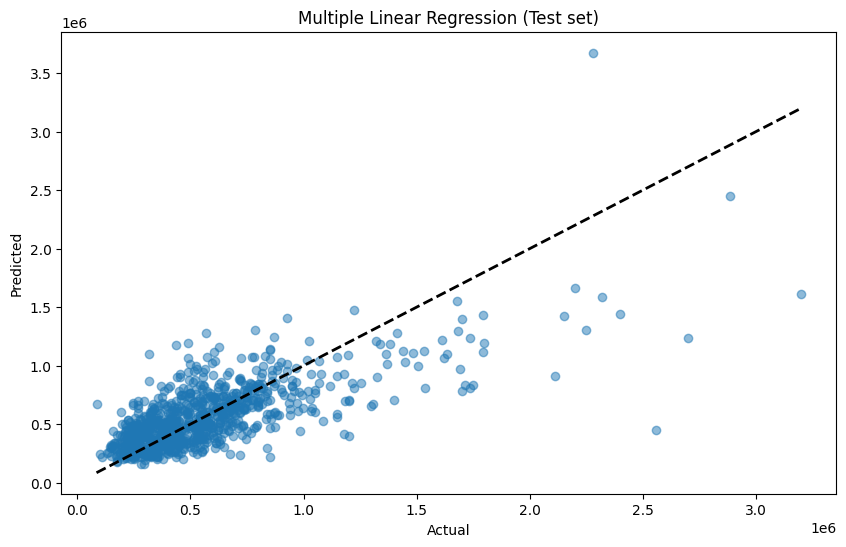

Final Linear Regression equation:
bedrooms: -57956.504631000695
bathrooms: -585.4435083001964
sqft_living: 311.29359961148253
sqft_lot: -0.7372139352939371
floors: 1603.6987916115122
Intercept: 92637.15020328865
Multiple Linear Regression:
Mean Squared Error: 64824582590.05947
R2 Score: 0.5118325420827885


In [51]:
def combined_linear_regression(df, features, target, regression_type='simple'):
    if regression_type == 'simple':
        # Simple Linear Regression
        feature = features  # Single feature for simple linear regression
        X = df[[feature]]
        y = df[target]
        
        # Splitting the dataset into the Training set and Test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Training the Simple Linear Regression model on the Training set
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predicting the Test set results
        y_pred = model.predict(X_test)
        
        # Predicting the Specific Value
        specific_value = np.array([[3000]])  # Example specific value
        specific_pred = model.predict(specific_value)
        print(f"Prediction for specific value {specific_value[0][0]}: {specific_pred[0]}")
        
        # Visualising the Training set results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color='blue')
        plt.plot(X_train, model.predict(X_train), color='red')
        plt.title('Simple Linear Regression (Training set)')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()
        
        # Visualising the Testing set results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, color='blue')
        plt.plot(X_train, model.predict(X_train), color='red')
        plt.title('Simple Linear Regression (Test set)')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()
        
        # Getting the Final Linear Regression equation
        print(f"Final Linear Regression equation: y = {model.coef_[0]} * X + {model.intercept_}")
        
        # Evaluating the Model Performance
        print("Simple Linear Regression:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
        print(f"R2 Score: {r2_score(y_test, y_pred)}")
    
    elif regression_type == 'multiple':
        # Multiple Linear Regression
        X = df[features]
        y = df[target]
        
        # Splitting the dataset into the Training set and Test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Training the Multiple Linear Regression model on the Training set
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predicting the Test set results
        y_pred = model.predict(X_test)
        
        # Predicting the Specific Value
        specific_value = np.array([[3, 2, 3000, 5000, 1]])  # Example specific value
        specific_pred = model.predict(specific_value)
        print(f"Prediction for specific value {specific_value[0]}: {specific_pred[0]}")
        
        # Visualising the Training set results
        plt.figure(figsize=(10, 6))
        plt.scatter(y_train, model.predict(X_train), alpha=0.5)
        plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Multiple Linear Regression (Training set)')
        plt.show()
        
        # Visualising the Testing set results
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Multiple Linear Regression (Test set)')
        plt.show()
        
        # Getting the Final Linear Regression equation
        print("Final Linear Regression equation:")
        for i, feature in enumerate(features):
            print(f"{feature}: {model.coef_[i]}")
        print(f"Intercept: {model.intercept_}")
        
        # Evaluating the Model Performance
        print("Multiple Linear Regression:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
        print(f"R2 Score: {r2_score(y_test, y_pred)}")

# Example usage
# For simple linear regression
combined_linear_regression(df, 'sqft_living', 'price', regression_type='simple')

# For multiple regression
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
combined_linear_regression(df, features, 'price', regression_type='multiple')

preproccessing

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(df, features, target):
    # Handling missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    
    # Encoding categorical features (if any)
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    X = np.array(ct.fit_transform(df[features]))
    
    # Encoding the target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Creating a binary target variable for classification (expensive vs. cheap houses)
median_price = df['price'].median()
df['price_category'] = np.where(df['price'] > median_price, 1, 0)

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target = 'price_category'
X_train, X_test, y_train, y_test = preprocess_data(df, features, target)

##Classification Models

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    
    # Calculating the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    
    # Classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    return accuracy

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_accuracy = train_and_evaluate_model(logistic_model, "Logistic Regression", X_train, X_test, y_train, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy = train_and_evaluate_model(knn_model, "K-Nearest Neighbors", X_train, X_test, y_train, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_accuracy = train_and_evaluate_model(naive_bayes_model, "Naive Bayes", X_train, X_test, y_train, y_test)

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_accuracy = train_and_evaluate_model(decision_tree_model, "Decision Tree", X_train, X_test, y_train, y_test)

# Determining the most accurate model
accuracies = {
    "Logistic Regression": logistic_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Naive Bayes": naive_bayes_accuracy,
    "Decision Tree": decision_tree_accuracy
}

most_accurate_model = max(accuracies, key=accuracies.get)
print(f"The most accurate model is: {most_accurate_model} with an accuracy of {accuracies[most_accurate_model]:.2f}")

Confusion Matrix for Logistic Regression:
[[362  96]
 [138 314]]
Accuracy for Logistic Regression: 0.74
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       458
           1       0.77      0.69      0.73       452

    accuracy                           0.74       910
   macro avg       0.74      0.74      0.74       910
weighted avg       0.74      0.74      0.74       910

Confusion Matrix for K-Nearest Neighbors:
[[336 122]
 [132 320]]
Accuracy for K-Nearest Neighbors: 0.72
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       458
           1       0.72      0.71      0.72       452

    accuracy                           0.72       910
   macro avg       0.72      0.72      0.72       910
weighted avg       0.72      0.72      0.72       910

Confusion Matrix for Naive Bayes:
[[456   2]

##Clustering Models

##Data Versioning